BigWig files:
    
Tiling MPRA: 
for GATA and MYC locus: `/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/OL43_K562_20211228.bp.bw`<br>

for FADS: `/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/FADS_tiling20190828_pos.b38_1bpWindow.bw`<br>

K562_ATACseq: 

inputs: 
`ll /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/*bw`<br>

output: `ll /data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep{1,2,3,4}.f3q10.sorted.with_umis.dedup.cpm.bw`

### what to do:

 - generate MACS peak calls for K562 ASTARRSeq
 - for the MACS generated peaks, extract out signals from the bigwig files for both ASTARR and MPRA
 - find correlation between these signals

In [17]:
import pyBigWig
import pandas as pd

gata_myc_bw = pyBigWig.open("/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/OL43_K562_20211228.bp.bw")

gata = bw.intervals('chrX',47786554,49786554)
gata_df = pd.DataFrame(list(gata), columns=['start','end','signal'])
gata_df['chr'] = 'chrX'
gata_df = gata_df[['chr','start','end','signal']]

myc = bw.intervals('chr8',126736069,128736069)
myc_df = pd.DataFrame(list(myc), columns=['start','end','signal'])
myc_df['chr'] = 'chr8'
myc_df = myc_df[['chr','start','end','signal']]

In [23]:
gata_df[gata_df['signal'].isna()]

,chr,start,end,signal


In [5]:
%%writefile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/GATA_MYC_loci.bed
chr8	126,736,069	128,736,069
chrX	47,786,554	49,786,554

Writing /data/reddylab/Revathy/collabs/Jamborees/03152022/data/GATA_MYC_loci.bed


In [13]:
!ls /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/*bw

/data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep1.masked.exclude_dups.cpm.bw
/data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep2.masked.exclude_dups.cpm.bw
/data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep3.masked.exclude_dups.cpm.bw
/data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw
/data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep5.masked.exclude_dups.cpm.bw
/data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-bla

In [3]:
%%bash 
ls /data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep{1,2,3,4}.f3q10.sorted.with_umis.dedup.cpm.bw

/data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep1.f3q10.sorted.with_umis.dedup.cpm.bw
/data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.sorted.with_umis.dedup.cpm.bw
/data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep3.f3q10.sorted.with_umis.dedup.cpm.bw
/data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw


In [4]:
%%bash
sbatch 
--partition all \
--cpus-per-task 16 \
--mem=32G \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/K562_deep_ASTARRseq_bigWigCompare.out \
<<'EOF'
#!/bin/bash
module load deepTools
multiBigwigSummary bins \
    -b \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep1.masked.exclude_dups.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep2.masked.exclude_dups.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep3.masked.exclude_dups.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep5.masked.exclude_dups.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep6.masked.exclude_dups.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep1.f3q10.sorted.with_umis.dedup.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.sorted.with_umis.dedup.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep3.f3q10.sorted.with_umis.dedup.cpm.bw \
    /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw \
    --outFileName /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_deep_ASTARRseq_bigWigCompare.npz \
    --smartLabels \
    --numberOfProcessors 16 \
    
EOF

Submitted batch job 28159882


In [24]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_deep_ASTARRseq_bigWigCompare.npz \
--corMethod pearson \
--whatToPlot heatmap \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_deep_ASTARRseq_bigWigCompare.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_deep_ASTARRseq_bigWigCompare.pdf 

*Warning*. 70500 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting


1. Average signal across the inputs in ASTARR, Average signals across the outputs
2. Subtract input from output
3. Compare the input subtracted to the MPRA

## Output to input logRatio for ASTARR bigWigs


In [32]:
%%bash
sbatch \
    -p all \
    --cpus-per-task 16 \
    --mem=32G \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/output_to_input_rep1.log \
    <<'EOF'
#!/bin/bash
module load deepTools
bigwigCompare \
    --bigwig1 \
    /data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep1.f3q10.sorted.with_umis.dedup.cpm.bw \
    --bigwig2 \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep1.masked.exclude_dups.cpm.bw \
    --binSize 1 \
    --numberOfProcessors 16 \
    --operation subtract \
    --outFileFormat bigwig \
    --outFileName \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Input_subtracted_rep1.with_umis.dedup.cpm.bw \

EOF

Submitted batch job 28192732


In [33]:
%%bash
sbatch \
    -p all \
    --cpus-per-task 16 \
    --mem=32G \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/output_to_input_rep2.log \
    <<'EOF'
#!/bin/bash
module load deepTools
bigwigCompare \
    --bigwig1 \
    /data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep2.f3q10.sorted.with_umis.dedup.cpm.bw \
    --bigwig2 \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep2.masked.exclude_dups.cpm.bw \
    --binSize 1 \
    --numberOfProcessors 16 \
    --operation subtract \
    --outFileFormat bigwig \
    --outFileName \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Input_subtracted_rep2.with_umis.dedup.cpm.bw \

EOF

Submitted batch job 28192733


In [34]:
%%bash
sbatch \
    -p all \
    --cpus-per-task 16 \
    --mem=32G \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/output_to_input_rep3.log \
    <<'EOF'
#!/bin/bash
module load deepTools
bigwigCompare \
    --bigwig1 \
    /data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep3.f3q10.sorted.with_umis.dedup.cpm.bw \
    --bigwig2 \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep3.masked.exclude_dups.cpm.bw \
    --binSize 1 \
    --numberOfProcessors 16 \
    --operation subtract \
    --outFileFormat bigwig \
    --outFileName \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Input_subtracted_rep3.with_umis.dedup.cpm.bw \

EOF

Submitted batch job 28192734


In [35]:
%%bash
sbatch \
    -p all \
    --cpus-per-task 16 \
    --mem=32G \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/output_to_input_rep4.log \
    <<'EOF'
#!/bin/bash
module load deepTools
bigwigCompare \
    --bigwig1 \
    /data/reddylab/Alex/encode4_duke//processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw \
    --bigwig2 \
    /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw \
    --binSize 1 \
    --numberOfProcessors 16 \
    --operation subtract \
    --outFileFormat bigwig \
    --outFileName \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Input_subtracted_rep4.with_umis.dedup.cpm.bw \

EOF

Submitted batch job 28192735


In [1]:
import pyBigWig

bwIn = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep1.with_umis.dedup.cpm.bw')
print(bwIn.header())

bwOutput = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep1_GATA_MYC.with_umis.dedup.cpm.bw','w')
bwOutput.addHeader([('chr8',145138636),('chrX',156040895)]) # chromosome size

for x in bwIn.intervals('chr8',126736069,128736069):
    bwOutput.addEntries(['chr8'],[x[0]],ends=[x[1]],values=[x[2]])


for x in bwIn.intervals('chrX',47786554,49786554):
    bwOutput.addEntries(['chrX'],[x[0]],ends=[x[1]],values=[x[2]])
    
bwOutput.close()

{'nBasesCovered': 2939078776, 'minVal': -3, 'sumSquared': 38862215, 'sumData': -18296103, 'nLevels': 9, 'version': 4, 'maxVal': 4}


In [2]:
import pyBigWig

bwIn = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep2.with_umis.dedup.cpm.bw')
print(bwIn.header())

bwOutput = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep2_GATA_MYC.with_umis.dedup.cpm.bw','w')
bwOutput.addHeader([('chr8',145138636),('chrX',156040895)]) # chromosome size

for x in bwIn.intervals('chr8',126736069,128736069):
    bwOutput.addEntries(['chr8'],[x[0]],ends=[x[1]],values=[x[2]])


for x in bwIn.intervals('chrX',47786554,49786554):
    bwOutput.addEntries(['chrX'],[x[0]],ends=[x[1]],values=[x[2]])
    
bwOutput.close()

{'nBasesCovered': 2939055683, 'minVal': -2, 'sumSquared': 32562040, 'sumData': -20733203, 'nLevels': 9, 'version': 4, 'maxVal': 4}


In [3]:
import pyBigWig

bwIn = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep3.with_umis.dedup.cpm.bw')
print(bwIn.header())

bwOutput = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep3_GATA_MYC.with_umis.dedup.cpm.bw','w')
bwOutput.addHeader([('chr8',145138636),('chrX',156040895)]) # chromosome size

for x in bwIn.intervals('chr8',126736069,128736069):
    bwOutput.addEntries(['chr8'],[x[0]],ends=[x[1]],values=[x[2]])


for x in bwIn.intervals('chrX',47786554,49786554):
    bwOutput.addEntries(['chrX'],[x[0]],ends=[x[1]],values=[x[2]])
    
bwOutput.close()

{'nBasesCovered': 2939001881, 'minVal': -3, 'sumSquared': 22460216, 'sumData': -23488645, 'nLevels': 9, 'version': 4, 'maxVal': 4}


In [4]:
import pyBigWig

bwIn = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4.with_umis.dedup.cpm.bw')
print(bwIn.header())

bwOutput = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4_GATA_MYC.with_umis.dedup.cpm.bw','w')
bwOutput.addHeader([('chr8',145138636),('chrX',156040895)]) # chromosome size

for x in bwIn.intervals('chr8',126736069,128736069):
    bwOutput.addEntries(['chr8'],[x[0]],ends=[x[1]],values=[x[2]])


for x in bwIn.intervals('chrX',47786554,49786554):
    bwOutput.addEntries(['chrX'],[x[0]],ends=[x[1]],values=[x[2]])
    
bwOutput.close()

{'nBasesCovered': 2939078827, 'minVal': -2, 'sumSquared': 25707719, 'sumData': -19159646, 'nLevels': 9, 'version': 4, 'maxVal': 5}


In [5]:
%%bash
sbatch -p all \
--cpus-per-task 16 \
--mem=32G \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/K562_deep_ASTARRseq_bigWigCompare.out \
<<'EOF'
#!/bin/bash
module load deepTools
multiBigwigSummary bins \
    -b \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep1_GATA_MYC.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep2_GATA_MYC.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep3_GATA_MYC.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4_GATA_MYC.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/OL43_K562_20211228.bp.bw \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_bigWigCompare.npz
EOF

Submitted batch job 28187234


In [41]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_bigWigCompare.npz \
--corMethod spearman --skipZeros \
--labels ASTARR_OutIn_rep1 ASTARR_OutIn_rep2 ASTARR_OutIn_rep3 ASTARR_OutIn_rep4 tiling_MPRA \
--whatToPlot heatmap \
--plotHeight 10.5 \
--plotTitle "Correlation between tiling MPRA and deep ASTARR-log2ratio(Output/Input)" \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_bigWigCompare.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/plots/K562_ASTARRseq_tiling_MPRA_GATA_MYC_bigWigCompare.pdf 

*Warning*. 148592 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting


In [40]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_bigWigCompare.npz \
--corMethod pearson --skipZeros \
--labels ASTARR_OutIn_rep1 ASTARR_OutIn_rep2 ASTARR_OutIn_rep3 ASTARR_OutIn_rep4 tiling_MPRA \
--whatToPlot scatterplot \
--plotHeight 10 \
--plotWidth 12 \
--plotTitle "Correlation between tiling MPRA and deep ASTARR-log2ratio(Output/Input)" \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_bigWigCompare.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/plots/K562_ASTARRseq_tiling_MPRA_GATA_MYC_bigWigCompare_scatterplot.pdf 

*Warning*. 148592 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting


### Outputs-to-Inputs from ATAC-STARR compared with MPRA for FADS

In [ ]:

chr11:61,797,628-61,869,354


In [28]:
import pyBigWig

bwIn = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4.with_umis.dedup.cpm.bw')
print(bwIn.header())

bwOutput = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4_FADS.with_umis.dedup.cpm.bw','w')
bwOutput.addHeader([('chr11',135086622)]) # chromosome size

for x in bwIn.intervals('chr11',61797628,61869354):
    bwOutput.addEntries(['chr11'],[x[0]],ends=[x[1]],values=[x[2]])
    
bwOutput.close()

{'sumSquared': 25707719, 'nLevels': 9, 'version': 4, 'sumData': -19159646, 'minVal': -2, 'nBasesCovered': 2939078827, 'maxVal': 5}


In [29]:
%%bash
sbatch -p all \
--cpus-per-task 16 \
--mem=32G \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/K562_deep_ASTARRseq_bigWigCompare.out \
<<'EOF'
#!/bin/bash
module load deepTools
multiBigwigSummary bins \
    -b \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep1_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep2_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep3_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/FADS_tiling20190828_pos.b38_1bpWindow.bw \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_FADS_bigWigCompare.npz \
    --smartLabels \
    --outRawCounts /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_FADS_bigWigCompare.tab
EOF

Submitted batch job 28192725


In [45]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_FADS_bigWigCompare.npz \
--corMethod spearman --skipZeros \
--labels ASTARR_OutIn_rep1 ASTARR_OutIn_rep2 ASTARR_OutIn_rep3 ASTARR_OutIn_rep4 tiling_MPRA \
--whatToPlot scatterplot \
--plotHeight 10.5 \
--plotTitle "Correlation between tiling MPRA and deep ASTARR-log2ratio(Output/Input)-FADS" \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_FADS_bigWigCompare.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/plots/K562_ASTARRseq_tiling_MPRA_FADS_bigWigCompare_scatterplot.pdf 

*Warning*. 67501 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting


### Merge BigWig files from tiling MPRA


In [47]:
%%bash
/data/common/shared_conda_envs/ucsc/bin/bigWigMerge /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/FADS_tiling20190828_pos.b38_1bpWindow.bw /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/OL43_K562_20211228.bp.bw \
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bedGraph

Got 3 chromosomes from 2 bigWigs
Processing


In [51]:
%%bash 
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bedGraph \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.sorted.bedGraph
/data/common/shared_conda_envs/ucsc/bin/bedGraphToBigWig /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.sorted.bedGraph /data/reddylab/Reference_Data/Genomes/hg38/hg38.fa.chrom.sizes /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bw

### Get the MYC, GATA and FADS region from ASTARR peaks

In [55]:
import pyBigWig

bwIn = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4.with_umis.dedup.cpm.bw')
print(bwIn.header())

bwOutput = pyBigWig.open('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4_GATA_MYC_FADS.with_umis.dedup.cpm.bw','w')
bwOutput.addHeader([('chr8',145138636),('chr11',135086622),('chrX',156040895)]) # chromosome size

for x in bwIn.intervals('chr8',126736069,128736069):
    bwOutput.addEntries(['chr8'],[x[0]],ends=[x[1]],values=[x[2]])

for x in bwIn.intervals('chr11',61797628,61869354):
    bwOutput.addEntries(['chr11'],[x[0]],ends=[x[1]],values=[x[2]])
    
for x in bwIn.intervals('chrX',47786554,49786554):
    bwOutput.addEntries(['chrX'],[x[0]],ends=[x[1]],values=[x[2]])
    
    
bwOutput.close()

{'sumSquared': 25707719, 'nLevels': 9, 'version': 4, 'sumData': -19159646, 'minVal': -2, 'nBasesCovered': 2939078827, 'maxVal': 5}


### cCREs for the 3 loci

In [58]:
import pandas as pd

ccre = 

,chr1,181251,181601,EH38E1310153,0,.,181251.1,181601.1,"6,218,147",DNase-only,All-data/Full-classification
0,chr1,190865,191071,EH38E1310154,0,.,190865,191071,"225,225,225",Low-DNase,All-data/Full-classification
1,chr1,778562,778912,EH38E1310158,0,.,778562,778912,"255,0,0","PLS,CTCF-bound",All-data/Full-classification
2,chr1,779086,779355,EH38E1310159,0,.,779086,779355,"255,0,0",PLS,All-data/Full-classification


In [60]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Reference_Data/cCREs/hg38/ENCFF971AHO_ENCFF847JMY_ENCFF779QTH_ENCFF405AYC.7group.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/GATA_MYC_FADS_loci.bed \
-wa \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_GATA_MYC_FADS_loci.bed

### multiBigwigSummary for ASTARR and MPRA (GATA, MYC&FADS) anchored at all cCREs

In [63]:
%%bash
sbatch -p all \
--cpus-per-task 16 \
--mem=32G \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/K562_deep_ASTARRseq_bigWigCompare_ccre.out \
<<'EOF'
#!/bin/bash
module load deepTools
multiBigwigSummary BED-file \
    -b \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep1_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep2_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep3_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bw \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_cCREs.npz \
    --BED /data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_GATA_MYC_FADS_loci.bed \
    --smartLabels \
    --outRawCounts /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_cCREs.tab
EOF

Submitted batch job 28192931


In [64]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_cCREs.npz \
--corMethod pearson --skipZeros \
--labels ASTARR_OutIn_rep1 ASTARR_OutIn_rep2 ASTARR_OutIn_rep3 ASTARR_OutIn_rep4 tiling_MPRA \
--whatToPlot heatmap \
--plotHeight 10.5 \
--plotTitle "Correlation between tiling MPRA and deep ASTARR-for GATA,MYC,FADS anchored at cCREs" \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_cCREs.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/plots/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_cCREs.pdf 

*Warning*. 47 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting


### cCREs based on their classification

In [4]:
import pandas as pd

ccres = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_GATA_MYC_FADS_loci.bed',sep='\t',
                   names=['chr','start','end','name','score','strand','start_v1','end_v1','number','classification','label'])
enhancer=['proximal enhancer-like signature','distal enhancer-like signature','pELS','dELS','dELS,CTCF-bound','pELS,CTCF-bound']
promoter=['PLS','PLS,CTCF-bound']
ccres[ccres['classification'].isin(enhancer)].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_enhancer_GATA_MYC_FADS_loci.bed', sep='\t', header=None, index=False)
ccres[ccres['classification'].isin(promoter)].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_promoter_GATA_MYC_FADS_loci.bed', sep='\t', header=None, index=False)



In [130]:
ccres[(ccres['chr']=='chrX')&(ccres['classification']=='Low-DNase')]

,chr,start,end,name,score,strand,start_v1,end_v1,number,classification,label
1158,chrX,47796557,47796905,EH38E2753817,0,.,47796557,47796905,"225,225,225",Low-DNase,All-data/Full-classification
1159,chrX,47798996,47799283,EH38E2753819,0,.,47798996,47799283,"225,225,225",Low-DNase,All-data/Full-classification
1160,chrX,47802599,47802936,EH38E2753820,0,.,47802599,47802936,"225,225,225",Low-DNase,All-data/Full-classification
1161,chrX,47803145,47803428,EH38E2753821,0,.,47803145,47803428,"225,225,225",Low-DNase,All-data/Full-classification
1162,chrX,47806265,47806603,EH38E2753823,0,.,47806265,47806603,"225,225,225",Low-DNase,All-data/Full-classification
1163,chrX,47806645,47806957,EH38E2753824,0,.,47806645,47806957,"225,225,225",Low-DNase,All-data/Full-classification
1164,chrX,47807630,47807970,EH38E2753826,0,.,47807630,47807970,"225,225,225",Low-DNase,All-data/Full-classification
1166,chrX,47815924,47816269,EH38E2753829,0,.,47815924,47816269,"225,225,225",Low-DNase,All-data/Full-classification
1167,chrX,47816429,47816774,EH38E2753830,0,.,47816429,47816774,"225,225,225",Low-DNase,All-data/Full-classification
1171,chrX,47837497,47837667,EH38E2753838,0,.,47837497,47837667,"225,225,225",Low-DNase,All-data/Full-classification


In [5]:
ccres['classification'][ccres['classification'].isin(enhancer)].unique()

array(['dELS', 'pELS', 'dELS,CTCF-bound', 'pELS,CTCF-bound'], dtype=object)

In [71]:
%%bash
sbatch -p all \
--cpus-per-task 16 \
--mem=32G \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/K562_deep_ASTARRseq_bigWigCompare_ccre.out \
<<'EOF'
#!/bin/bash
module load deepTools
multiBigwigSummary BED-file \
    -b \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep1_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep2_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep3_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/KS91_K562_hg38_ASTARRseq_Output_Input_log2ratio_rep4_GATA_MYC_FADS.with_umis.dedup.cpm.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bw \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.npz \
    --BED /data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_enhancer_GATA_MYC_FADS_loci.bed \
    --smartLabels \
    --outRawCounts /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.tab
EOF

Submitted batch job 28193041


In [75]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.npz \
--corMethod pearson --skipZeros \
--labels ASTARR_OutIn_rep1 ASTARR_OutIn_rep2 ASTARR_OutIn_rep3 ASTARR_OutIn_rep4 tiling_MPRA \
--whatToPlot heatmap \
--plotHeight 10.5 \
--plotWidth 12.5 \
--plotTitle "Correlation-tiling MPRA and deep ASTARR-for GATA,MYC,FADS anchored at Enhancer cCREs" \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/plots/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.pdf 

*Warning*. 4 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting


Next Steps:

- Use the input-output ratios of bw files from the ASTARR, MPRA bws for the three loci anchored at all cCREs in these regions, enhancer like cCREs and promoter like cCREs (3 different analysis) - instead of using the 1bp resolution, use the average signal in that particular cCRE coordinates. 
- Probably integrate the CRISPR dataset too to this set later - not now

In [6]:
%%bash
module load deepTools
multiBigwigSummary BED-file \
-b \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bw \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.npz \
--BED /data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_enhancer_GATA_MYC_FADS_loci.bed \
--smartLabels \
--outRawCounts /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.tab



The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_KI270310v1	      1201
chr5_GL000208v1_random	     92689
chrUn_KI270589v1	     44474
chr1_KI270708v1_random	    127682
chrUn_KI270580v1	      1553
chrUn_KI270581v1	      7046
chr1_KI270709v1_random	     66860
chr14_GL000194v1_random	    191469
chr22_KI270737v1_random	    103838
chrUn_KI270591v1	      5796
chrUn_KI270379v1	      1045
chrUn_KI270429v1	      1361
chrUn_KI270334v1	      1368
           chr6	 170805979
chr22_KI270736v1_random	    181920
chrUn_KI270381v1	      1930
chrUn_GL000226v1	     15008
chrUn_KI270748v1	     93321
chrUn_KI270322v1	     21476
chrUn_KI270423v1	       981
           chr4	 190214555
chrUn_KI270374v1	      2656
chr1_KI270706v1_random	    175055
chr1_KI270710v1_random	     40176
chrUn_KI270393v1	      1308
chrUn_KI270320v1	      4416
chrUn_KI270317v1	     37690
chr1_KI270712v1_random	    176043
chrUn_KI270516v1	      1300
chrUn_KI270419v1	      1029
chrUn_KI270584v1

In [7]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.npz \
--corMethod pearson --skipZeros \
--labels ASTARR_OutIn_rep1 ASTARR_OutIn_rep2 ASTARR_OutIn_rep3 ASTARR_OutIn_rep4 tiling_MPRA \
--whatToPlot heatmap \
--plotHeight 10.5 \
--plotWidth 12.5 \
--plotTitle "Correlation-tiling MPRA and deep ASTARR-for GATA,MYC,FADS anchored at Enhancer cCREs" \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/plots/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.pdf 

*Warning*. 4 NaN values were found. They will be removed along with the corresponding bins in other samples for the computation and plotting


In [10]:
%%bash
module load deepTools
multiBigwigSummary BED-file \
-b \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bw \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Promoter_cCREs.npz \
--BED /data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_promoter_GATA_MYC_FADS_loci.bed \
--smartLabels \
--outRawCounts /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Promoter_cCREs.tab



The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_KI270334v1	      1368
chr1_KI270706v1_random	    175055
chr22_KI270735v1_random	     42811
chr22_KI270731v1_random	    150754
          chr13	 114364328
          chr10	 133797422
chr4_GL000008v2_random	    209709
chrUn_KI270749v1	    158759
chrUn_KI270389v1	      1298
chrUn_GL000220v1	    161802
          chr21	  46709983
chrUn_KI270394v1	       970
chrUn_KI270539v1	       993
chrUn_KI270751v1	    150742
          chr17	  83257441
chrUn_KI270316v1	      1444
chrUn_KI270385v1	       990
chrUn_KI270510v1	      2415
chrUn_KI270374v1	      2656
chr14_KI270723v1_random	     38115
chr14_KI270724v1_random	     39555
chr22_KI270733v1_random	    179772
chrUn_KI270590v1	      4685
chrUn_KI270442v1	    392061
chrUn_GL000224v1	    179693
chrUn_KI270744v1	    168472
chr9_KI270720v1_random	     39050
chr9_KI270718v1_random	     38054
chr14_KI270725v1_random	    172810
chrUn_KI270512v1	     22689
         

In [11]:
%%bash
module load deepTools
plotCorrelation --corData /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Promoter_cCREs.npz \
--corMethod pearson --skipZeros \
--labels ASTARR_OutIn_rep1 ASTARR_OutIn_rep2 ASTARR_OutIn_rep3 ASTARR_OutIn_rep4 tiling_MPRA \
--whatToPlot heatmap \
--plotHeight 10.5 \
--plotWidth 12.5 \
--plotTitle "Correlation-tiling MPRA and deep ASTARR-for GATA,MYC,FADS anchored at Promoter cCREs" \
--outFileCorMatrix /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Promoter_cCREs.tsv \
--plotFile /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/plots/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Promoter_cCREs.pdf 

In [117]:
import pandas as pd

enhancer_ccres = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Enhancer_cCREs.tab', sep='\t')

new_headers = []
for header in enhancer_ccres.columns: 
    header = header.strip("''") 
    new_headers.append(header)
enhancer_ccres.columns = new_headers 
values = enhancer_ccres[['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10',
                         'KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10','tiling_MPRA_GATA_MYC_FADS_1bpWindow']]

values['ASTARRseq_rep1'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10']-0.023480)/0.096447
values['ASTARRseq_rep2'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10']-0.004354)/0.075516
values['ASTARRseq_rep3'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10']-0.021987)/0.092351
values['ASTARRseq_rep4'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10']-0.012903)/0.093292
values['tiling_MPRA'] = (values['tiling_MPRA_GATA_MYC_FADS_1bpWindow']-1.752600)/1.384438

values_zscore = values[['ASTARRseq_rep1','ASTARRseq_rep2','ASTARRseq_rep3','ASTARRseq_rep4','tiling_MPRA']]
values_zscore.describe()

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ASTARRseq_rep1,ASTARRseq_rep2,ASTARRseq_rep3,ASTARRseq_rep4,tiling_MPRA
count,1.980000e+02,198.000000,198.000000,1.980000e+02,1.940000e+02
mean,2.456836e-07,0.000006,-0.000002,-3.778104e-07,3.417341e-07
std,1.000001e+00,0.999996,0.999995,1.000001e+00,1.000000e+00
min,-1.484166e+00,-2.013758,-1.290967,-1.501356e+00,-1.243310e+00
25%,-3.936916e-01,-0.362166,-0.380435,-3.390005e-01,-8.295052e-01
50%,-2.569176e-01,-0.169748,-0.251828,-2.123079e-01,-2.530175e-01
75%,-6.053524e-02,-0.040870,-0.081849,-9.948290e-02,6.796801e-01
max,5.413762e+00,6.280366,6.075839,7.378013e+00,2.893651e+00


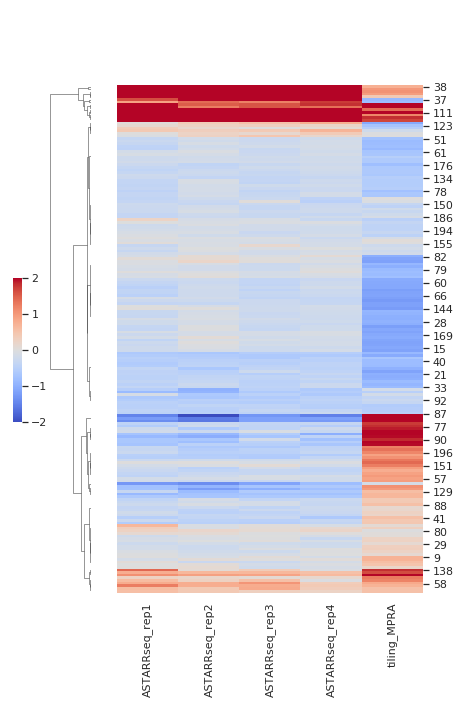

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)


sns.clustermap(values_zscore.dropna(), figsize = (6,10), dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', vmin=-2, vmax=2, cmap='coolwarm', col_cluster=False)

In [112]:
import pandas as pd

promoter_ccres = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_Promoter_cCREs.tab', sep='\t')

new_headers = []
for header in enhancer_ccres.columns: 
    header = header.strip("''") 
    new_headers.append(header)
promoter_ccres.columns = new_headers 
values = promoter_ccres[['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10',
                         'KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10','tiling_MPRA_GATA_MYC_FADS_1bpWindow']]

values['ASTARRseq_rep1'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10']-0.046704)/0.116596
values['ASTARRseq_rep2'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10']+0.004930)/0.089726
values['ASTARRseq_rep3'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10']-0.033962)/0.104519
values['ASTARRseq_rep4'] = (values['KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10']-0.013727)/0.088312
values['tiling_MPRA'] = (values['tiling_MPRA_GATA_MYC_FADS_1bpWindow']-3.886650)/1.495937
values_zscore = values[['ASTARRseq_rep1','ASTARRseq_rep2','ASTARRseq_rep3','ASTARRseq_rep4','tiling_MPRA']]
values_zscore.describe()

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ASTARRseq_rep1,ASTARRseq_rep2,ASTARRseq_rep3,ASTARRseq_rep4,tiling_MPRA
count,52.000000,52.000000,52.000000,52.000000,5.200000e+01
mean,-0.000003,-0.000002,-0.000004,-0.000003,2.040553e-07
std,1.000001,1.000005,1.000000,1.000001,9.999997e-01
min,-1.582438,-1.943109,-1.618086,-1.877287,-2.099742e+00
25%,-0.618894,-0.449152,-0.589753,-0.555314,-6.789248e-01
50%,-0.245900,-0.107648,-0.227837,-0.246666,1.435205e-02
75%,0.328301,0.328216,0.343432,0.477127,7.461943e-01
max,3.268608,3.901788,4.057682,3.589476,1.675430e+00


In [122]:
enhancer_ccres.shape

(198, 8)

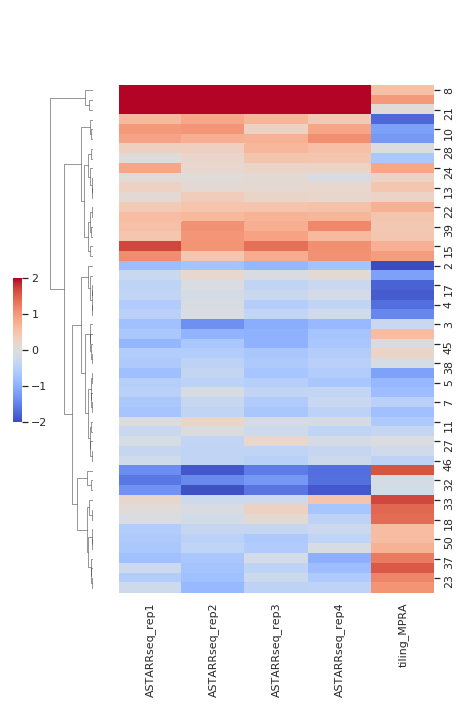

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1)

sns.clustermap(values_zscore.dropna(), figsize = (6,10), dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', vmin=-2, vmax=2, cmap='coolwarm', col_cluster=False)

### Clustermap for assays anchored at all cCREs

In [52]:
%%bash
module load deepTools
multiBigwigSummary BED-file \
-b \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10.bw \
/data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bw \
-o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_all_cCREs.npz \
--BED /data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_GATA_MYC_FADS_loci.bed \
--smartLabels \
--outRawCounts /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_all_cCREs.tab



The following chromosome names did not match between the bigwig files
chromosome	length
chrUn_KI270374v1	      2656
chrUn_KI270582v1	      6504
chrUn_KI270429v1	      1361
          chr22	  50818468
chrUn_KI270388v1	      1216
         chrEBV	    171823
chrUn_KI270302v1	      2274
chrUn_KI270381v1	      1930
chrUn_KI270411v1	      2646
chrUn_KI270425v1	      1884
chr22_KI270734v1_random	    165050
chr22_KI270736v1_random	    181920
chrUn_KI270419v1	      1029
chrUn_KI270748v1	     93321
chrUn_KI270378v1	      1048
chrUn_KI270333v1	      2699
chrUn_KI270320v1	      4416
          chr20	  64444167
chrUn_KI270467v1	      3920
chrUn_KI270747v1	    198735
chrUn_KI270757v1	     71251
chr14_GL000225v1_random	    211173
chrUn_KI270384v1	      1658
chrUn_KI270311v1	     12399
chrUn_KI270371v1	      2805
chrUn_KI270515v1	      6361
chrUn_KI270518v1	      2186
chrUn_KI270529v1	      1899
chrUn_KI270385v1	       990
          chr15	 101991189
chrUn_KI270521v1	      7642
chrUn_KI270418v1	      214

In [84]:
import pandas as pd

signal_ccres = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_all_cCREs.tab', sep='\t')
ccres = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_GATA_MYC_FADS_loci.bed',sep='\t',
                   names=['chr','start','end','name','score','strand','start_v1','end_v1','number','classification','label'])

new_headers = []
for header in enhancer_ccres.columns: 
    header = header.strip("'#'") 
    new_headers.append(header)
signal_ccres.columns = new_headers 

ccres_with_class = signal_ccres.merge(ccres, on=['chr','start','end'], how='inner')
ccres_signals = ccres_with_class[['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10',
                                  'KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10','tiling_MPRA_GATA_MYC_FADS_1bpWindow','classification']]

ccres_signals['ASTARRseq_rep1'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10']-0.003654)/0.041009
ccres_signals['ASTARRseq_rep2'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10']+0.001221)/0.030904
ccres_signals['ASTARRseq_rep3'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10']-0.003231)/0.038373
ccres_signals['ASTARRseq_rep4'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10']-0.000250)/0.036769
ccres_signals['tiling_MPRA'] = (ccres_signals['tiling_MPRA_GATA_MYC_FADS_1bpWindow']-0.942626)/1.056626

ccres_signal_zscore = ccres_signals[['ASTARRseq_rep1','ASTARRseq_rep2','ASTARRseq_rep3','ASTARRseq_rep4','tiling_MPRA','classification']]
ccres_signal_zscore.describe()

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,ASTARRseq_rep1,ASTARRseq_rep2,ASTARRseq_rep3,ASTARRseq_rep4,tiling_MPRA
count,1665.000000,1665.000000,1665.000000,1665.000000,1.618000e+03
mean,-0.000004,0.000011,0.000006,-0.000006,4.141323e-07
std,1.000007,0.999989,1.000008,0.999988,9.999998e-01
min,-3.449387,-5.761597,-3.606435,-4.142348,-8.918027e-01
25%,-0.181586,-0.108206,-0.154238,-0.121292,-6.458473e-01
50%,-0.120379,-0.018017,-0.104036,-0.053858,-3.648316e-01
75%,-0.040494,0.043249,-0.053032,-0.014499,2.464092e-01
max,13.215808,15.526894,15.111297,19.063956,5.158269e+00


/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

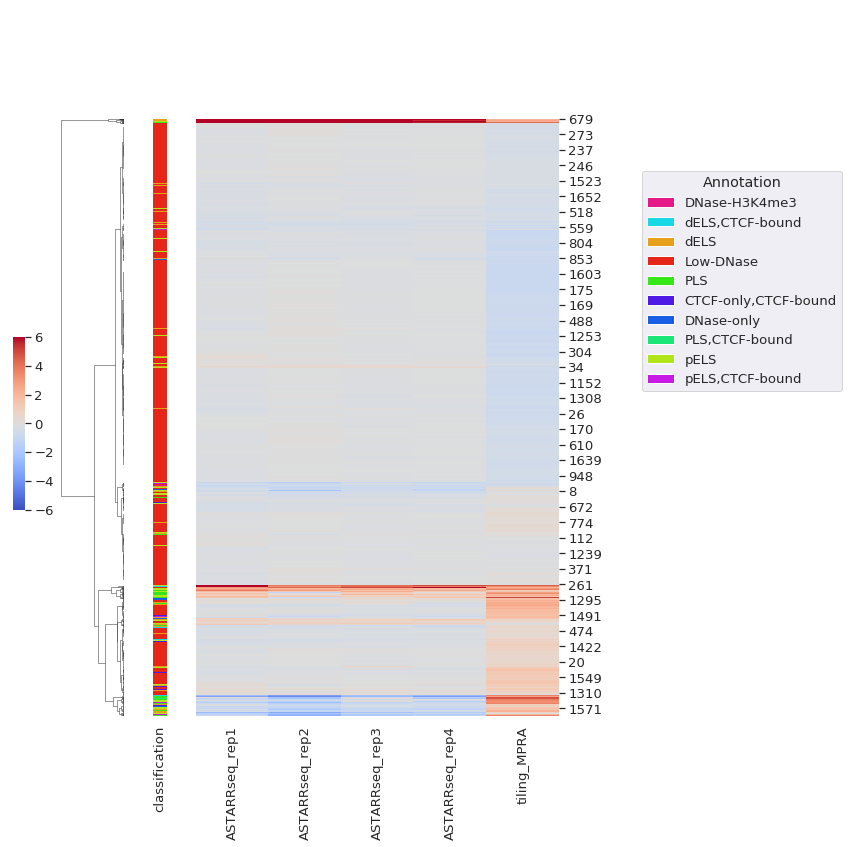

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1.2)

signal_ccres = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/K562_ASTARRseq_tiling_MPRA_GATA_MYC_FADS_bigWigCompare_for_all_cCREs.tab', sep='\t')
ccres = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/cCREs_GATA_MYC_FADS_loci.bed',sep='\t',
                   names=['chr','start','end','name','score','strand','start_v1','end_v1','number','classification','label'])

new_headers = []
for header in enhancer_ccres.columns: 
    header = header.strip("'#'") 
    new_headers.append(header)
signal_ccres.columns = new_headers 

ccres_with_class = signal_ccres.merge(ccres, on=['chr','start','end'], how='inner')
ccres_signals = ccres_with_class[['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10','KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10',
                                  'KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10','tiling_MPRA_GATA_MYC_FADS_1bpWindow','classification']]

ccres_signals['ASTARRseq_rep1'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep1.log2.pseudo_10']-0.003654)/0.041009
ccres_signals['ASTARRseq_rep2'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep2.log2.pseudo_10']+0.001221)/0.030904
ccres_signals['ASTARRseq_rep3'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep3.log2.pseudo_10']-0.003231)/0.038373
ccres_signals['ASTARRseq_rep4'] = (ccres_signals['KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10']-0.000250)/0.036769
ccres_signals['tiling_MPRA'] = (ccres_signals['tiling_MPRA_GATA_MYC_FADS_1bpWindow']-0.942626)/1.056626

ccres_signal_zscore = ccres_signals[['ASTARRseq_rep1','ASTARRseq_rep2','ASTARRseq_rep3','ASTARRseq_rep4','tiling_MPRA','classification']]

annot = ccres_signal_zscore.pop('classification')
lut = dict(zip(annot.unique(), sns.hls_palette(len(set(annot)), l=0.5, s=0.8)))
row_colors = annot.map(lut)
sns.clustermap(ccres_signal_zscore.dropna(), figsize = (8,12), dendrogram_ratio=0.15, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', vmin=-6, vmax=6, cmap='coolwarm', col_cluster=False, row_colors=row_colors)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Annotation',
           bbox_to_anchor=(1.4, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')

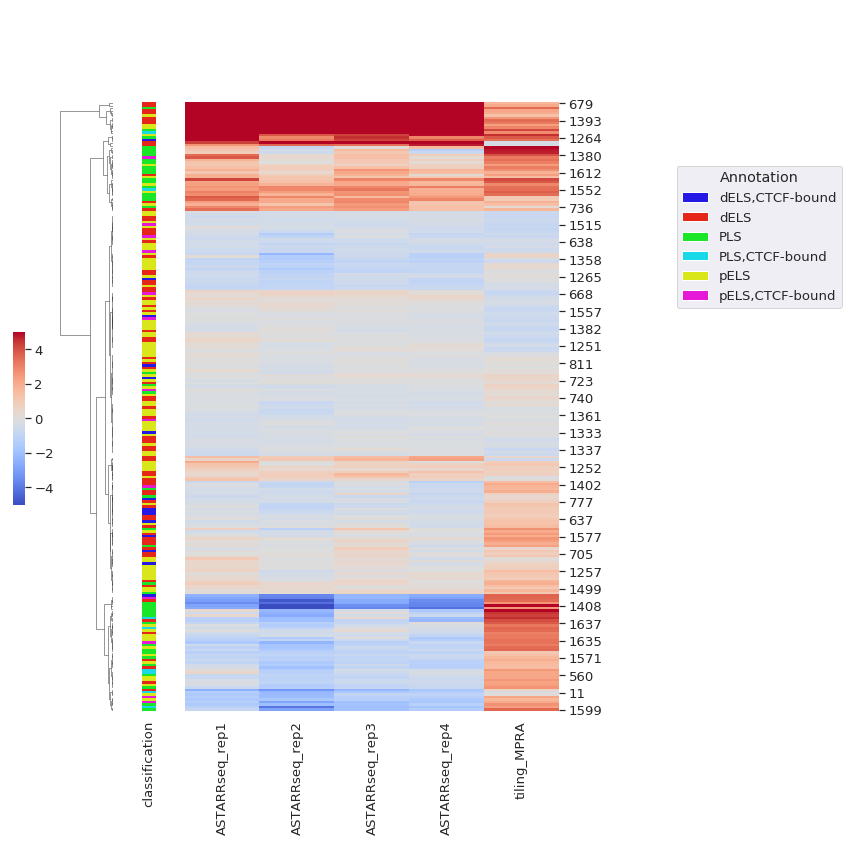

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
sns.set_context("talk")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(font_scale=1.2)

ccres_signal_zscore = ccres_signals[['ASTARRseq_rep1','ASTARRseq_rep2','ASTARRseq_rep3','ASTARRseq_rep4','tiling_MPRA','classification']]
group = ['dELS','pELS','PLS','PLS,CTCF-bound','dELS,CTCF-bound','pELS,CTCF-bound']
ccres_subset = ccres_signal_zscore[ccres_signal_zscore['classification'].isin(group)]


annot = ccres_subset.pop('classification')
lut = dict(zip(annot.unique(), sns.hls_palette(len(set(annot)), l=0.5, s=0.8)))
row_colors = annot.map(lut)
sns.clustermap(ccres_subset.dropna(), figsize = (8,12),dendrogram_ratio=0.125, cbar_pos=(-0.05,.4,.02,0.2), method = 'ward', vmin=-5, vmax=5, cmap='coolwarm', col_cluster=False, row_colors=row_colors)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Annotation',
           bbox_to_anchor=(1.4, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')


In [95]:
ccres_subset.describe()

,ASTARRseq_rep1,ASTARRseq_rep2,ASTARRseq_rep3,ASTARRseq_rep4,tiling_MPRA
count,250.000000,250.000000,250.000000,250.000000,246.000000
mean,0.601247,0.117922,0.553686,0.348780,1.193492
std,2.466747,2.542737,2.473469,2.504965,1.566006
min,-3.449387,-5.761597,-3.606435,-4.142348,-0.862473
25%,-0.472276,-0.925332,-0.458656,-0.587370,-0.167814
50%,-0.086690,-0.266770,-0.101041,-0.196179,0.831832
75%,0.518185,0.160575,0.459431,0.201251,2.347381
max,13.215808,15.526894,15.111297,19.063956,5.158269
